In [29]:
# import the necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [30]:
data = pd.read_csv("Creditcard.csv")

In [31]:
print(data.columns)

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')


In [54]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,normalizedAmount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403


In [33]:
# Print the shape of the data
print(data.shape)

(284807, 31)


In [34]:
print(data.describe())

                Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  1.759061e-12 -8.251130e-13 -9.654937e-13  8.321385e-13   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   1.649999e-13  4.248366e-13 -3.054600e-13  8.777971e-14 -1.179749e-12   
std    1.380247e+00  1.332271e+00  1.23709

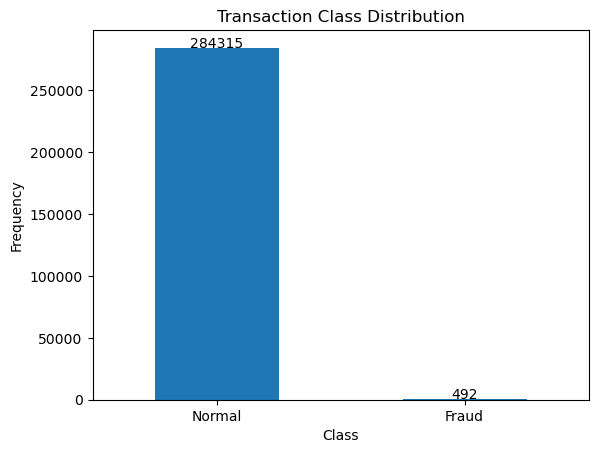

In [35]:
class_counts = data['Class'].value_counts(sort=True)

# Plot bar chart
ax = class_counts.plot(kind='bar', rot=0)
plt.title("Transaction Class Distribution")
plt.xticks(range(2), LABELS)
plt.xlabel("Class")
plt.ylabel("Frequency")

# Add count values on top of each bar
for i, v in enumerate(class_counts):
    ax.text(i, v + 10, str(v), ha='center')

plt.show()

In [39]:
#data-preprocessing
from sklearn.preprocessing import StandardScaler
data['normalizedAmount']=StandardScaler().fit_transform(data['Amount'].values.reshape(-1,1))
data=data.drop(['Amount'],axis=1)

In [40]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,normalizedAmount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403


In [41]:
fraud = data[data.Class == 1]
normal = data[data.Class == 0]

C:\Users\amare\AppData\Local\Temp\ipykernel_19252\1413394425.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(normal.Time, color='g')
C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


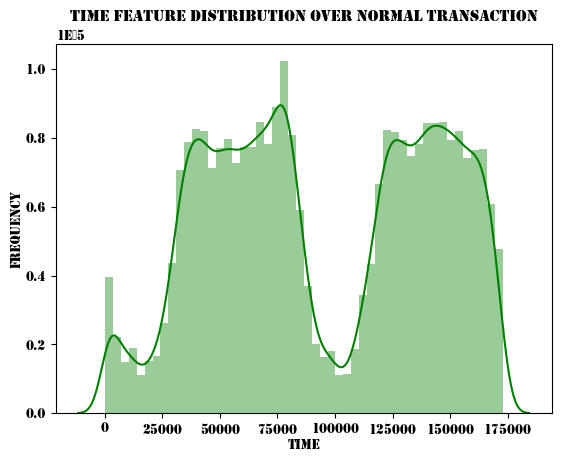

In [10]:
plt.rcParams['font.family'] = 'Stencil'
sns.distplot(normal.Time, color='g')
plt.title("Time feature distribution over Normal Transaction", fontname='Stencil')
plt.xlabel("Time", fontname='Stencil')
plt.ylabel("Frequency", fontname='Stencil')
plt.show()

C:\Users\amare\AppData\Local\Temp\ipykernel_19252\1926333744.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(fraud.Time, color='r')
C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


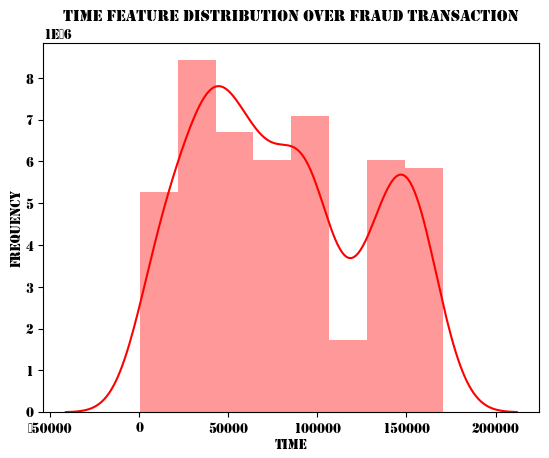

In [11]:
plt.rcParams['font.family'] = 'Stencil'
sns.distplot(fraud.Time, color='r')
plt.title("Time feature distribution over Fraud Transaction")
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.show()

C:\Users\amare\AppData\Local\Temp\ipykernel_35260\2336313423.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(normal.normalizedAmount, color='g')


Text(0, 0.5, 'Frequency')

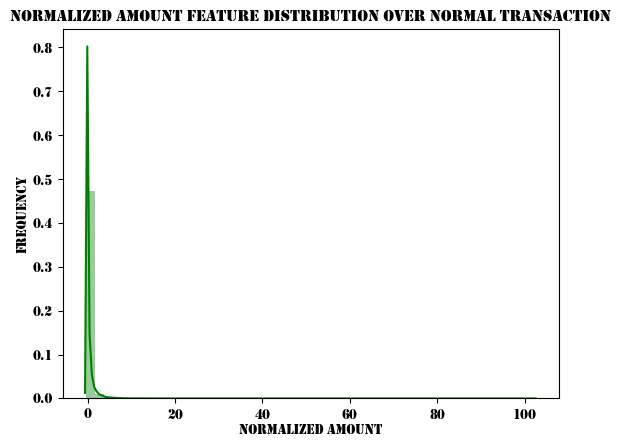

In [42]:
plt.rcParams['font.family'] = 'Stencil'
sns.distplot(normal.normalizedAmount, color='g')
plt.title("Normalized Amount feature distribution over Normal Transaction")
plt.xlabel("Normalized Amount")
plt.ylabel("Frequency")

C:\Users\amare\AppData\Local\Temp\ipykernel_21244\2788438053.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(fraud.normalizedAmount, color='r')


Text(0, 0.5, 'Frequency')

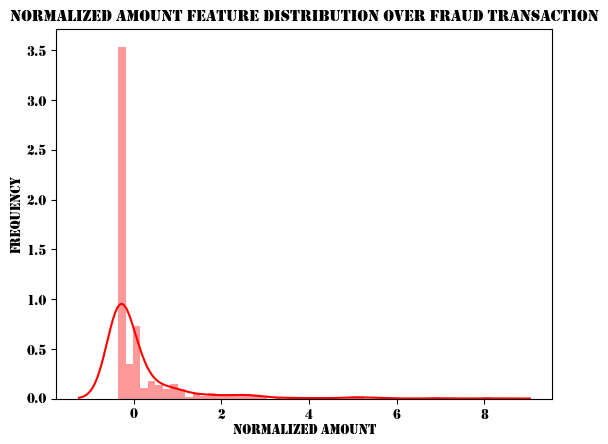

In [7]:
plt.rcParams['font.family'] = 'Stencil'
sns.distplot(fraud.normalizedAmount, color='r')
plt.title("Normalized Amount feature distribution over Fraud Transaction")
plt.xlabel("Normalized Amount")
plt.ylabel("Frequency")

In [43]:
# Determine number of fraud cases in dataset

outlier_fraction = len(Fraud)/float(len(Valid))
print(outlier_fraction)

print('Fraud Cases: {}'.format(len(data[data['Class'] == 1])))
print('Valid Transactions: {}'.format(len(data[data['Class'] == 0])))

0.0017304750013189597
Fraud Cases: 492
Valid Transactions: 284315


In [15]:
print("Amount details of fradulent transacation")
Fraud.normalizedAmount.describe()

Amount details of fradulent transacation


count    492.000000
mean       0.135382
std        1.026242
min       -0.353229
25%       -0.349231
50%       -0.316247
75%        0.070128
max        8.146182
Name: normalizedAmount, dtype: float64

In [16]:
print("Amount details of valid transaction")
Valid.normalizedAmount.describe()

Amount details of valid transaction


count    284315.000000
mean         -0.000234
std           0.999942
min          -0.353229
25%          -0.330640
50%          -0.265271
75%          -0.045177
max         102.362243
Name: normalizedAmount, dtype: float64

In [44]:
#seperating the X and the Y from the dataset
X=data.drop(['Class'], axis=1)
Y=data["Class"]
print(X.shape)
print(Y.shape)
#getting just the values for the sake of processing (its a numpy array with no columns)
X_data=X.values
Y_data=Y.values

(284807, 30)
(284807,)


In [45]:
X_data

array([[ 0.00000000e+00, -1.35980713e+00, -7.27811730e-02, ...,
         1.33558377e-01, -2.10530530e-02,  2.44964263e-01],
       [ 0.00000000e+00,  1.19185711e+00,  2.66150712e-01, ...,
        -8.98309900e-03,  1.47241690e-02, -3.42474541e-01],
       [ 1.00000000e+00, -1.35835406e+00, -1.34016307e+00, ...,
        -5.53527940e-02, -5.97518410e-02,  1.16068593e+00],
       ...,
       [ 1.72788000e+05,  1.91956501e+00, -3.01253846e-01, ...,
         4.45477200e-03, -2.65608290e-02, -8.18393021e-02],
       [ 1.72788000e+05, -2.40440050e-01,  5.30482513e-01, ...,
         1.08820735e-01,  1.04532821e-01, -3.13248531e-01],
       [ 1.72792000e+05, -5.33412522e-01, -1.89733337e-01, ...,
        -2.41530900e-03,  1.36489140e-02,  5.14355311e-01]])

In [46]:
#Using Scikit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X_data, Y_data, test_size = 0.3, random_state = 42)

In [47]:
from sklearn.metrics import classification_report, accuracy_score,precision_score,recall_score,f1_score,matthews_corrcoef
from sklearn.metrics import confusion_matrix

# Random Forest Classifier

In [48]:
# Building the Random Forest Classifier (RANDOM FOREST)
from sklearn.ensemble import RandomForestClassifier
# random forest model creation
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train,Y_train)
# predictions
y_pred = rfc.predict(X_test)

In [34]:
#Evaluating the classifier
#printing every score of the classifier
#scoring in any thing
from sklearn.metrics import classification_report, accuracy_score,precision_score,recall_score,f1_score,matthews_corrcoef
from sklearn.metrics import confusion_matrix
n_outliers = len(Fraud)
n_errors = (y_pred != Y_test).sum()
print("The model used is Random Forest classifier")
acc= accuracy_score(Y_test,y_pred)
print("The accuracy is  {}".format(acc*100))
prec= precision_score(Y_test,y_pred)
print("The precision is {}".format(prec*100))
rec= recall_score(Y_test,y_pred)
print("The recall is {}".format(rec*100))
f1= f1_score(Y_test,y_pred)
print("The F1-Score is {}".format(f1*100))
MCC=matthews_corrcoef(Y_test,y_pred)
print("The Matthews correlation coefficient is {}".format(MCC*100))

The model used is Random Forest classifier
The accuracy is  99.96254813150287
The precision is 93.33333333333333
The recall is 82.35294117647058
The F1-Score is 87.49999999999999
The Matthews correlation coefficient is 87.65319758290167


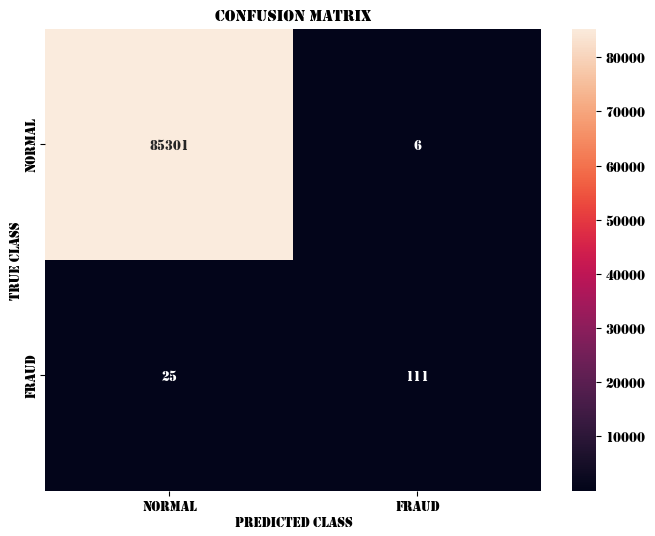

In [57]:
#visulalizing the confusion matrix
LABELS = ['Normal', 'Fraud'] 
cnf_matrix= confusion_matrix(Y_test, y_pred)
plt.figure(figsize =(8,6)) 
sns.heatmap(cnf_matrix, xticklabels = LABELS, yticklabels = LABELS, annot = True, fmt ="d"); 
plt.title("Confusion matrix") 
plt.ylabel('True class') 
plt.xlabel('Predicted class') 
plt.show()

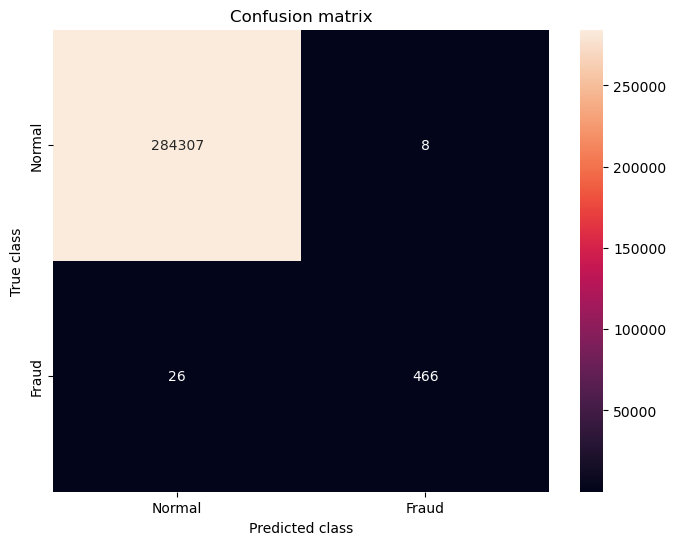

In [26]:
#visulalizing the confusion matrix
LABELS = ['Normal', 'Fraud'] 
y_pred= rfc.predict(X_data)
y_expected = pd.DataFrame(Y_data)
cnf_matrix= confusion_matrix(y_expected, y_pred.round())
plt.figure(figsize =(8,6)) 
sns.heatmap(cnf_matrix, xticklabels = LABELS, yticklabels = LABELS, annot = True, fmt ="d"); 
plt.title("Confusion matrix") 
plt.ylabel('True class') 
plt.xlabel('Predicted class') 
plt.show()

In [51]:
# Run classification metrics
plt.figure(figsize=(9, 7))
print(accuracy_score(Y_test, y_pred))
print(classification_report(Y_test, y_pred))

0.9996371850239341
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.95      0.82      0.88       136

    accuracy                           1.00     85443
   macro avg       0.97      0.91      0.94     85443
weighted avg       1.00      1.00      1.00     85443



<Figure size 900x700 with 0 Axes>

In [55]:
Time=float(input("Enter value of 'Time': "))
v1=float(input("Enter value of 'v1': "))
v2=float(input("Enter value of 'v2': "))
v3=float(input("Enter value of 'v3': "))
v4=float(input("Enter value of 'v4': "))
v5=float(input("Enter value of 'v5': "))
v6=float(input("Enter value of 'v6': "))
v7=float(input("Enter value of 'v7': "))
v8=float(input("Enter value of 'v8': "))
v9=float(input("Enter value of 'v9': "))
v10=float(input("Enter value of 'v10': "))
v11=float(input("Enter value of 'v11': "))
v12=float(input("Enter value of 'v12': "))
v13=float(input("Enter value of 'v13': "))
v14=float(input("Enter value of 'v14': "))
v15=float(input("Enter value of 'v15': "))
v16=float(input("Enter value of 'v16': "))
v17=float(input("Enter value of 'v17': "))
v18=float(input("Enter value of 'v18': "))
v19=float(input("Enter value of 'v19': "))
v20=float(input("Enter value of 'v20': "))
v21=float(input("Enter value of 'v21': "))
v22=float(input("Enter value of 'v22': "))
v23=float(input("Enter value of 'v23': "))
v24=float(input("Enter value of 'v24': "))
v25=float(input("Enter value of 'v25': "))
v26=float(input("Enter value of 'v26': "))
v27=float(input("Enter value of 'v27': "))
v28=float(input("Enter value of 'v28': "))
normalizedAmount=float(input("Enter value of 'Amount': "))

Enter value of 'Time': 1.0
Enter value of 'v1': 0.000234
Enter value of 'v2': 0.000087
Enter value of 'v3': -0.00034
Enter value of 'v4': 0.00234
Enter value of 'v5': -0.000345
Enter value of 'v6': 0.0034
Enter value of 'v7': -0.0000034
Enter value of 'v8': 0.0087
Enter value of 'v9': 0.000034
Enter value of 'v10': -0.0000234
Enter value of 'v11': 0.000876
Enter value of 'v12': -0.00096
Enter value of 'v13': 0.0008734
Enter value of 'v14': 0.0000873
Enter value of 'v15': 0.00564
Enter value of 'v16': -0.007634
Enter value of 'v17': 0.007654
Enter value of 'v18': 0.00965
Enter value of 'v19': 0.000234
Enter value of 'v20': -0.0098654
Enter value of 'v21': -0.00003675
Enter value of 'v22': 0.0000534
Enter value of 'v23': 0.0087654
Enter value of 'v24': -0.00765
Enter value of 'v25': -0.0000009876
Enter value of 'v26': 0.00000765
Enter value of 'v27': 0.000345
Enter value of 'v28': 0.0000876
Enter value of 'Amount': 0.244964


In [56]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, Y_train)

test_list = [Time,v1, v2, v3, v4, v5, v6, v7, v8, v9, v10,
             v11, v12, v13, v14, v15, v16, v17, v18, v19, v20,
             v21, v22, v23, v24, v25, v26, v27, v28, normalizedAmount]

test_df = pd.DataFrame(test_list)
test = test_df.transpose()

test_pred = model.predict(test)

if test_pred == 1:
    print("Fraudulent Transaction Detected.")
else:
    print("Non-Fraudulent Transaction.")


Non-Fraudulent Transaction.
